In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 9979, done.
remote: Total 9979 (delta 0), reused 0 (delta 0), pack-reused 9979
Receiving objects: 100% (9979/9979), 10.32 MiB | 22.34 MiB/s, done.
Resolving deltas: 100% (6918/6918), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.3 MB/s 
     |████████████████████████████████| 145 kB 5.1 MB/s 
     |████████████████████████████████| 178 kB 34.9 MB/s 
     |████████████████████████████████| 1.1 MB 35.5 MB/s 
     |████████████████████████████████| 138 kB 45.4 MB/s 
     |████████████████████████████████| 62 kB 778 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires i

In [3]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gsHNo0WMasdCsshlUDAL")
project = rf.workspace().project("cornbot_nlb")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cornbot_nlb-3 in yolov5pytorch:: 100%|██████████| 726/726 [00:01<00:00, 519.32it/s]


In [5]:
os.environ["DATASET_DIRECTORY"] = "/content/yolov5/cornbot_nlb-3"

In [6]:
!python train.py --img 1028 --batch 16 --epochs 100 --data /content/yolov5/cornbot_nlb-3/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/cornbot_nlb-3/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=16, imgsz=1028, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-96-g8df64a9 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, tr

# Inference

In [7]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 1028 --conf 0.1 --source /content/yolov5/cornbot_nlb-3/test/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/cornbot_nlb-3/test/images, imgsz=[1028, 1028], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-96-g8df64a9 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/18 /content/yolov5/cornbot_nlb-3/test/images/DSC00034_JPG.rf.0e3974e639699ec90f5c951f5008be95.jpg: 1056x1056 2 blights, Done. (0.070s)
image 2/18 /content/yolov5/cornbot_nlb-3/test/images/DSC00041_JPG.rf.24597ade89c4d2347a7af43e5ec592ef.jpg: 1056x1056 Done. (0.067s)
image 3/18 /content/yolov5/cornbot_nlb-3/test/images/DSC00048_JPG.rf.dfeae534e5c4336

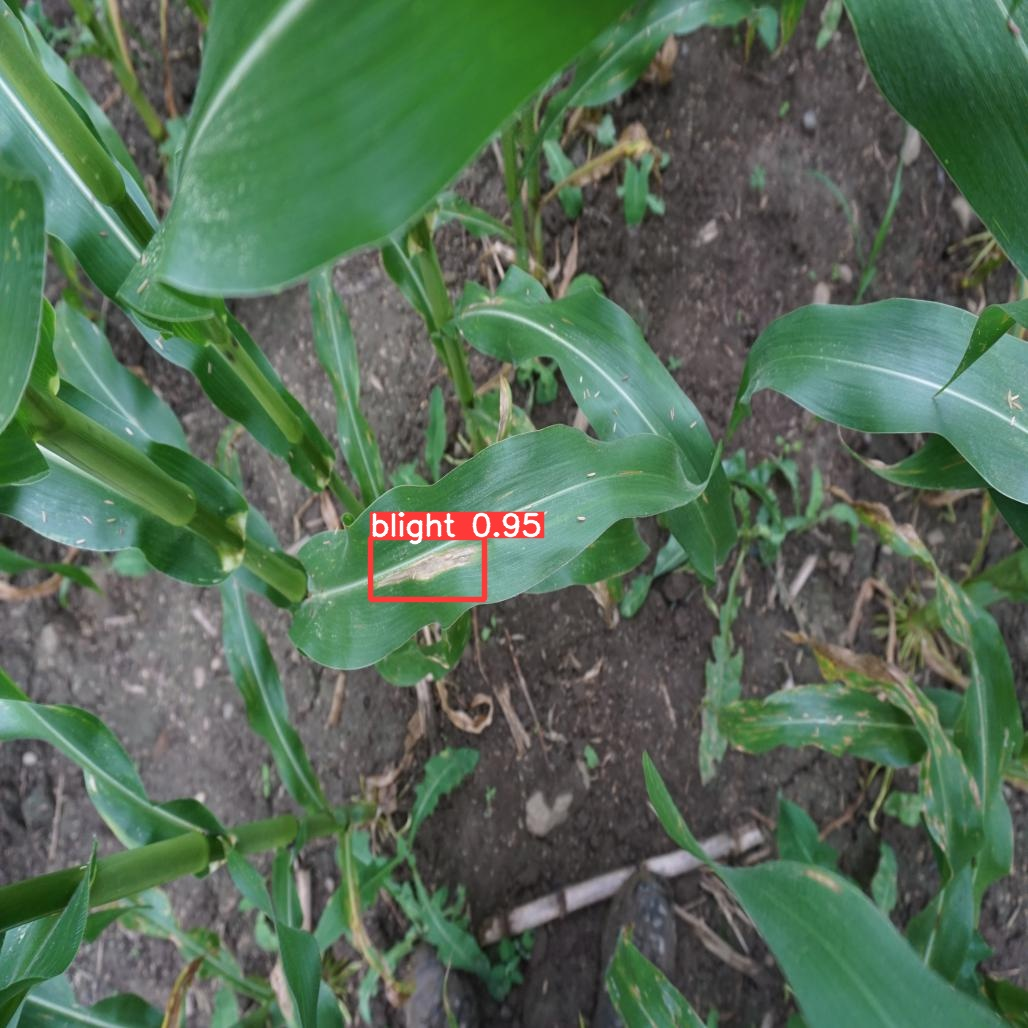

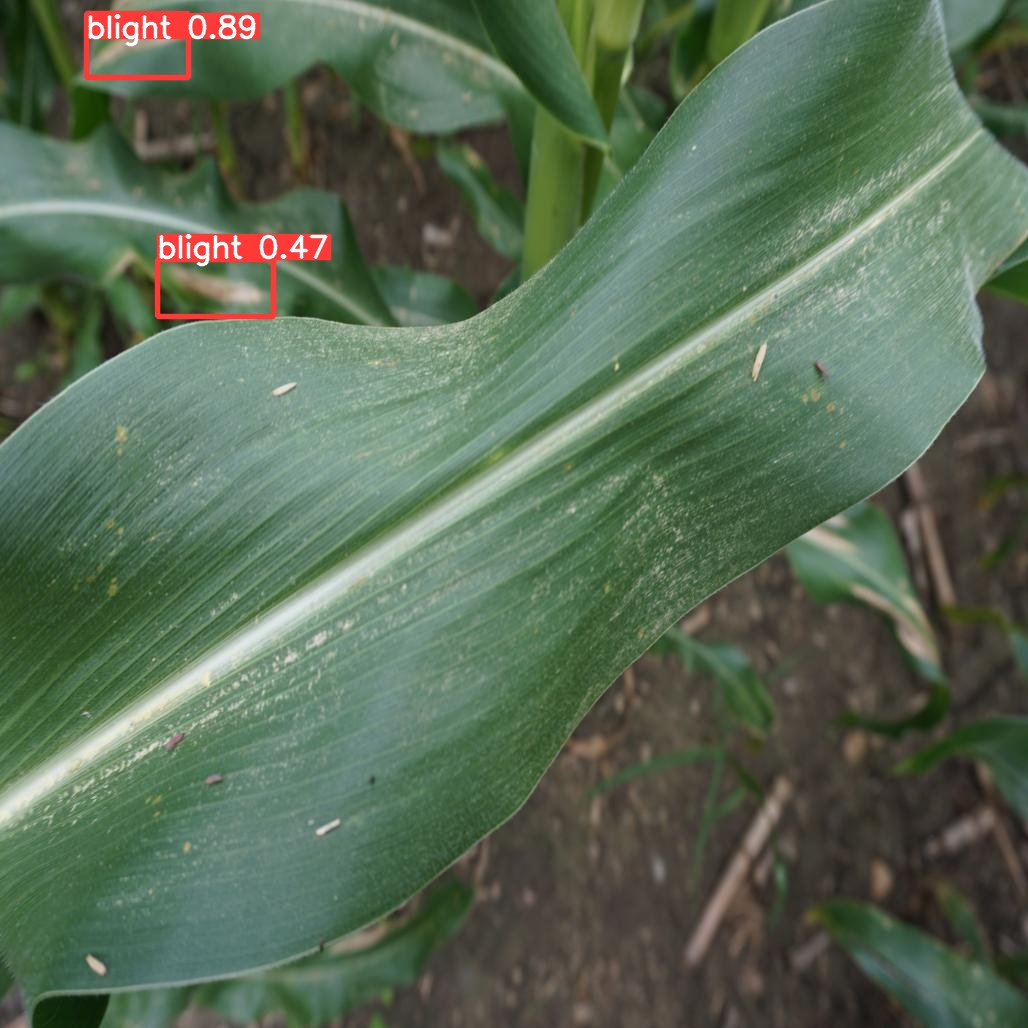

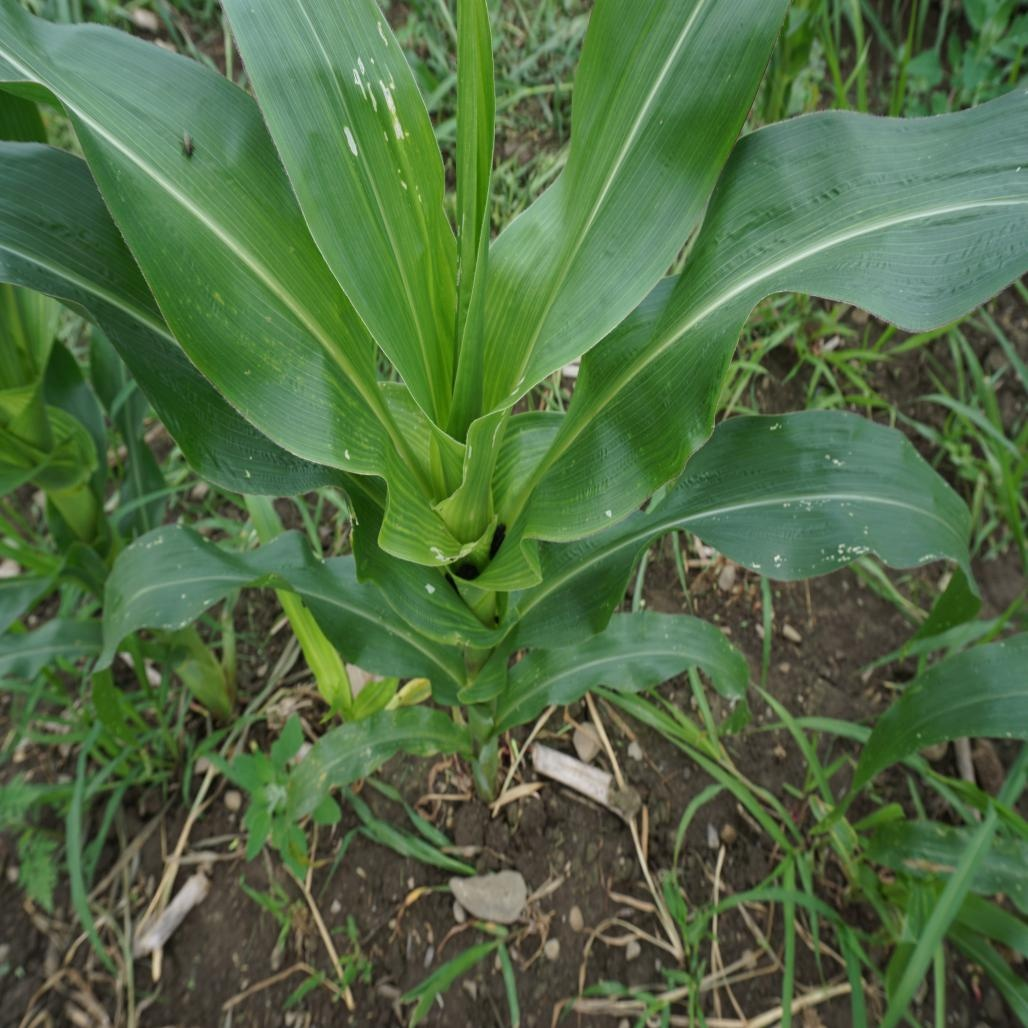

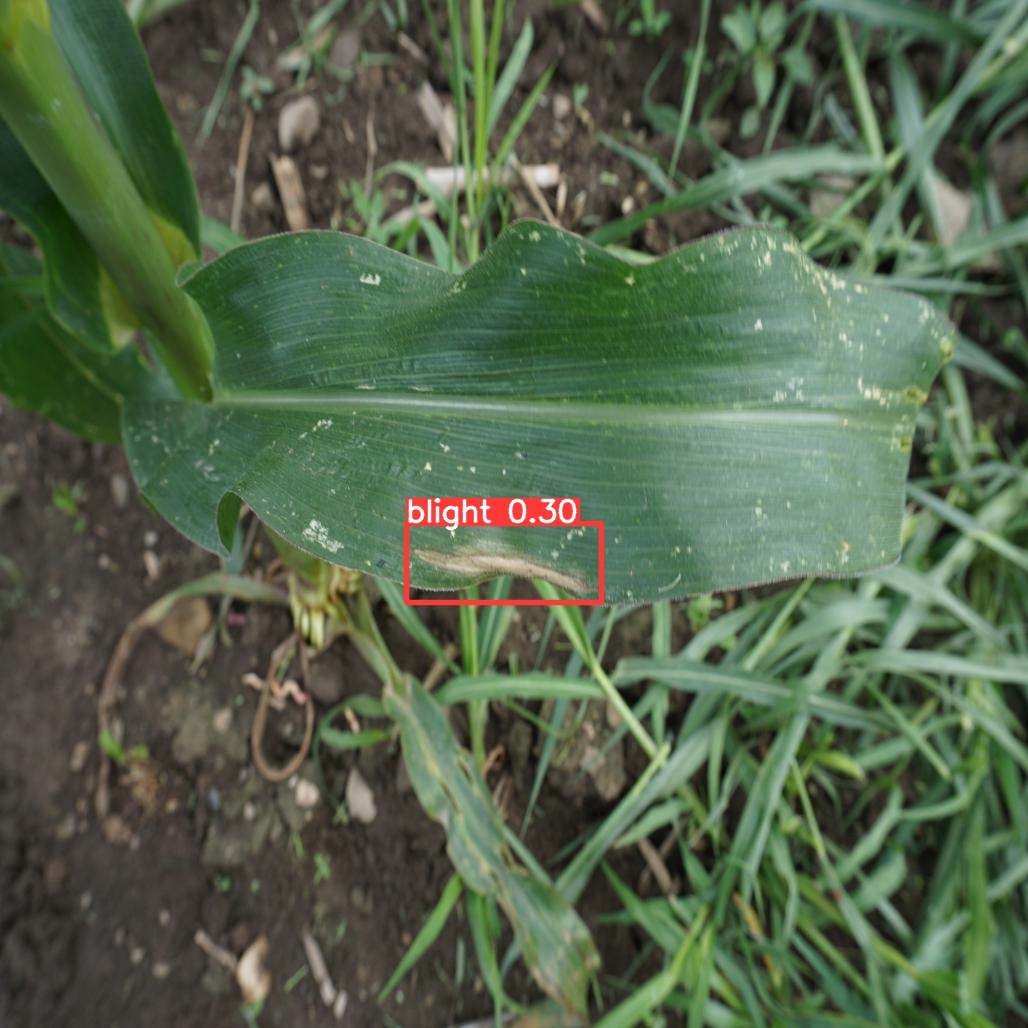

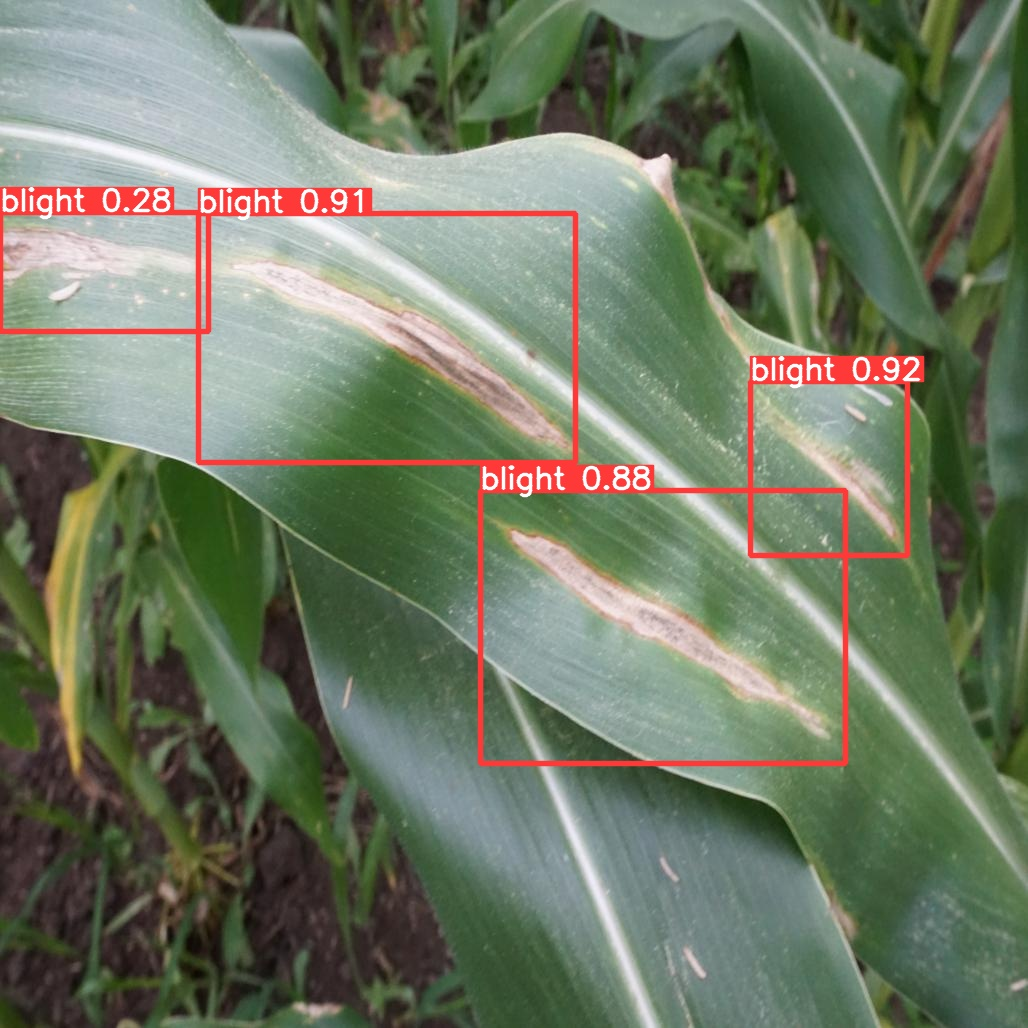

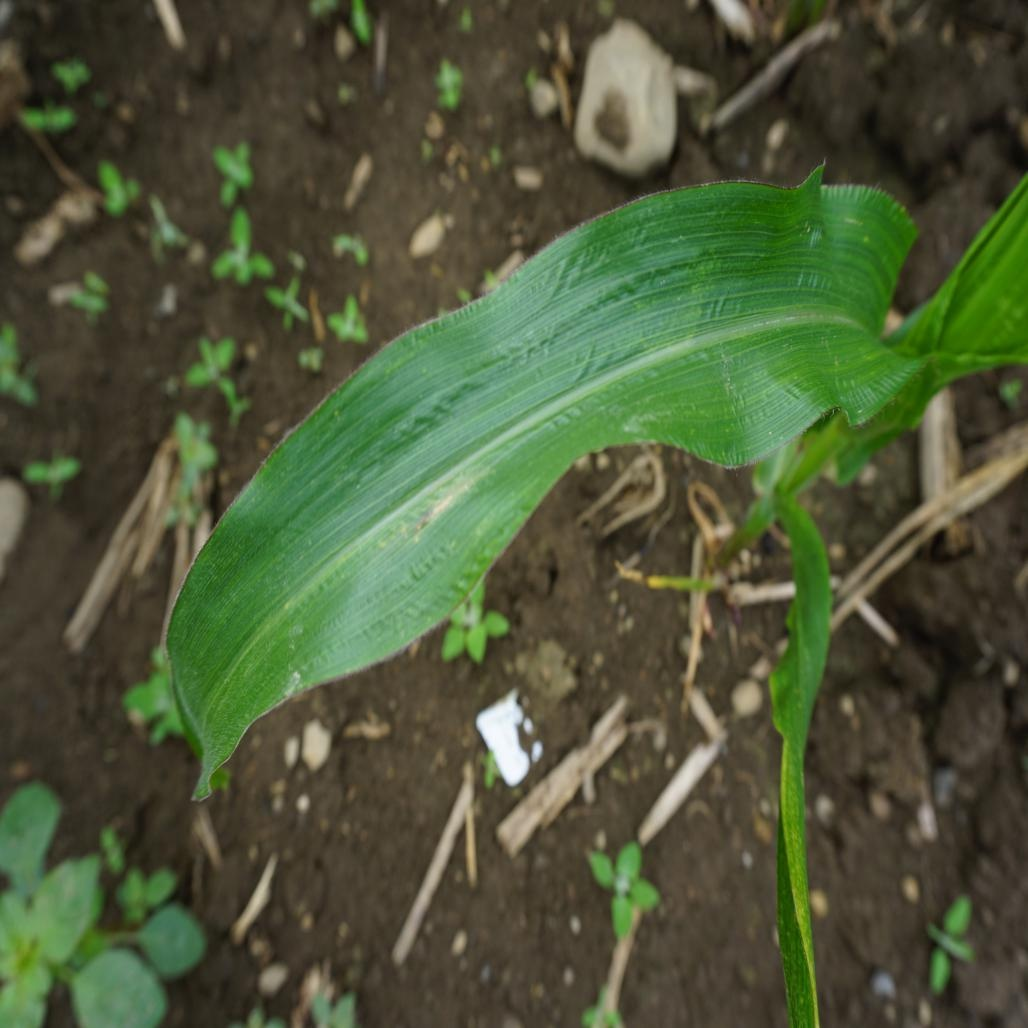

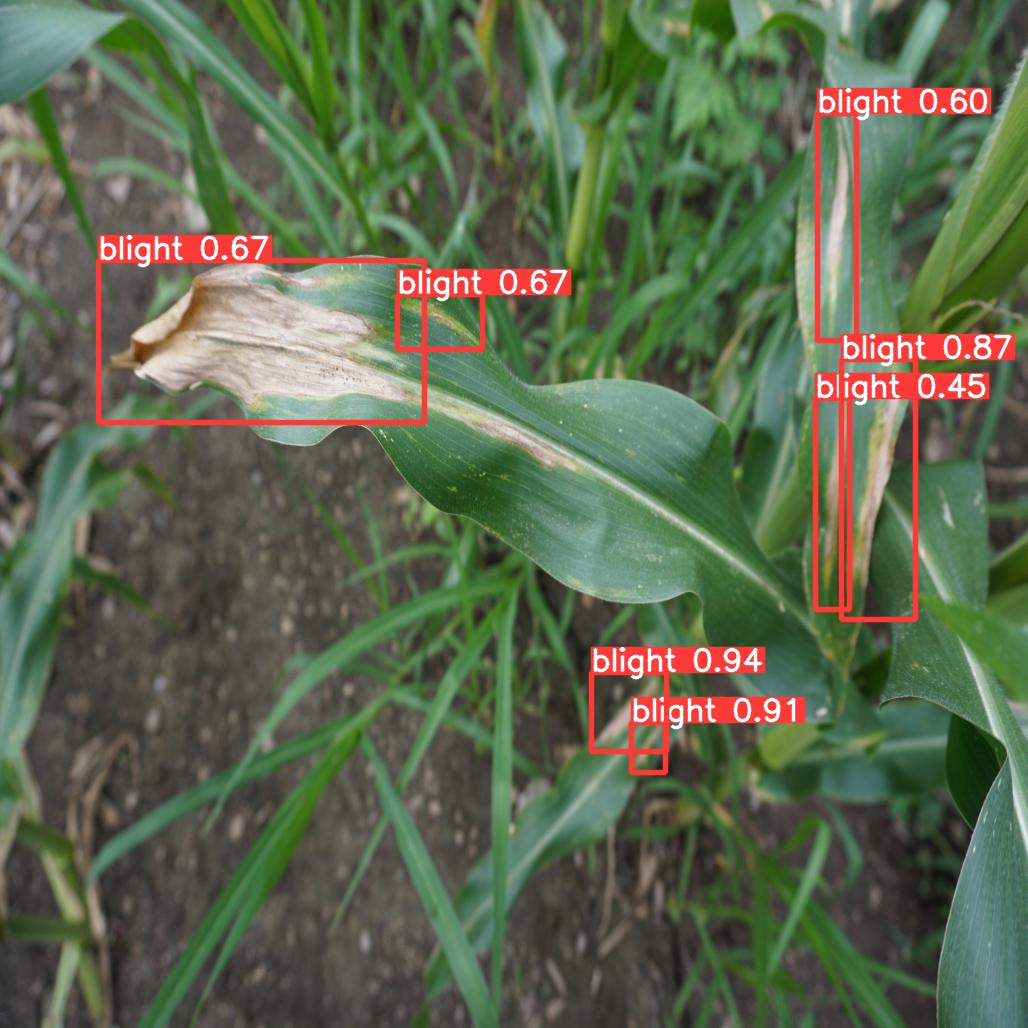

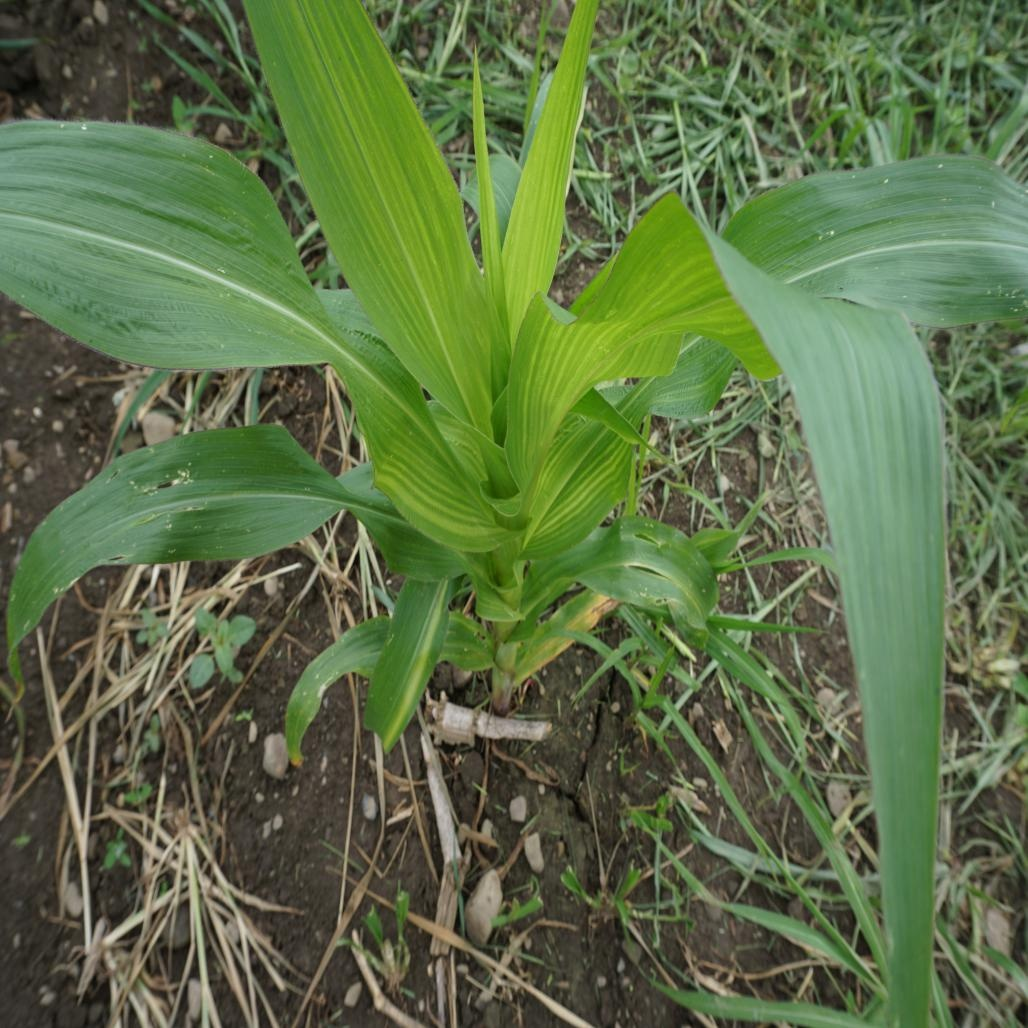

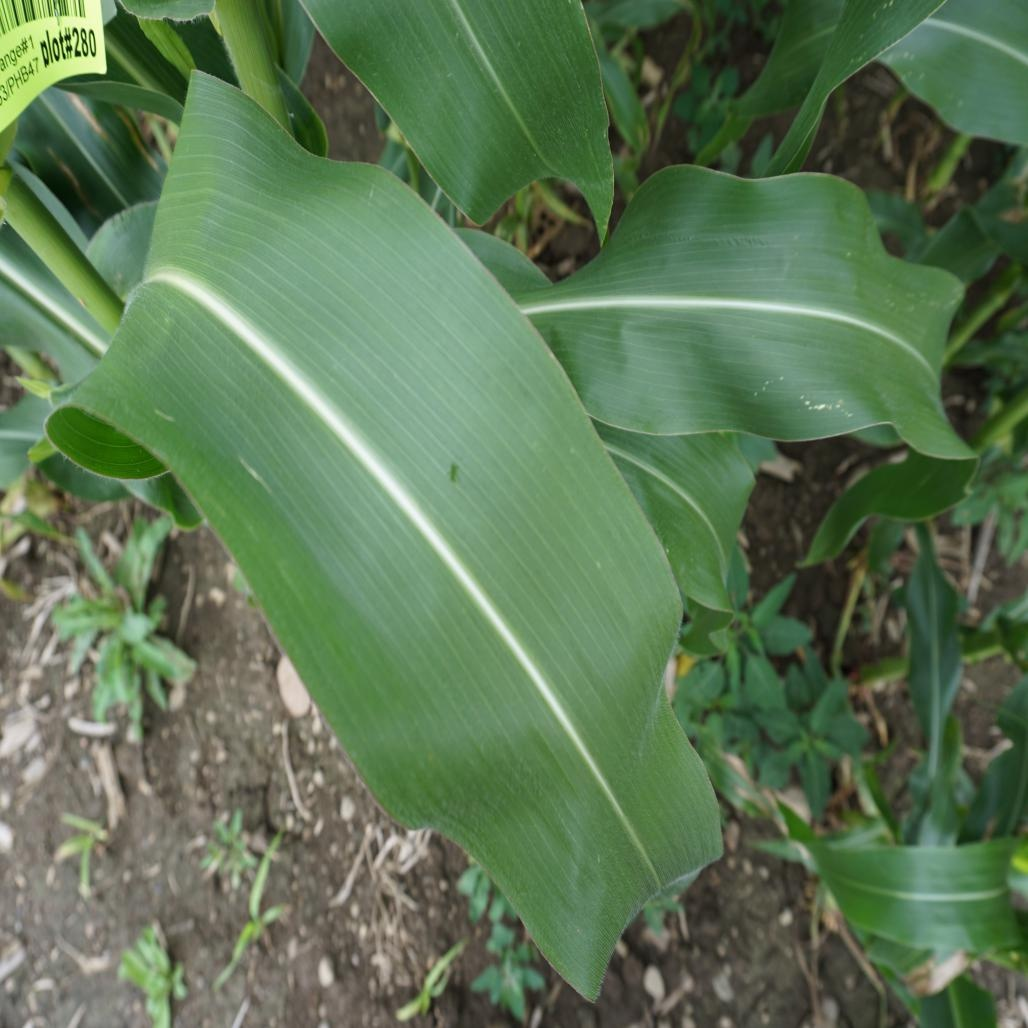

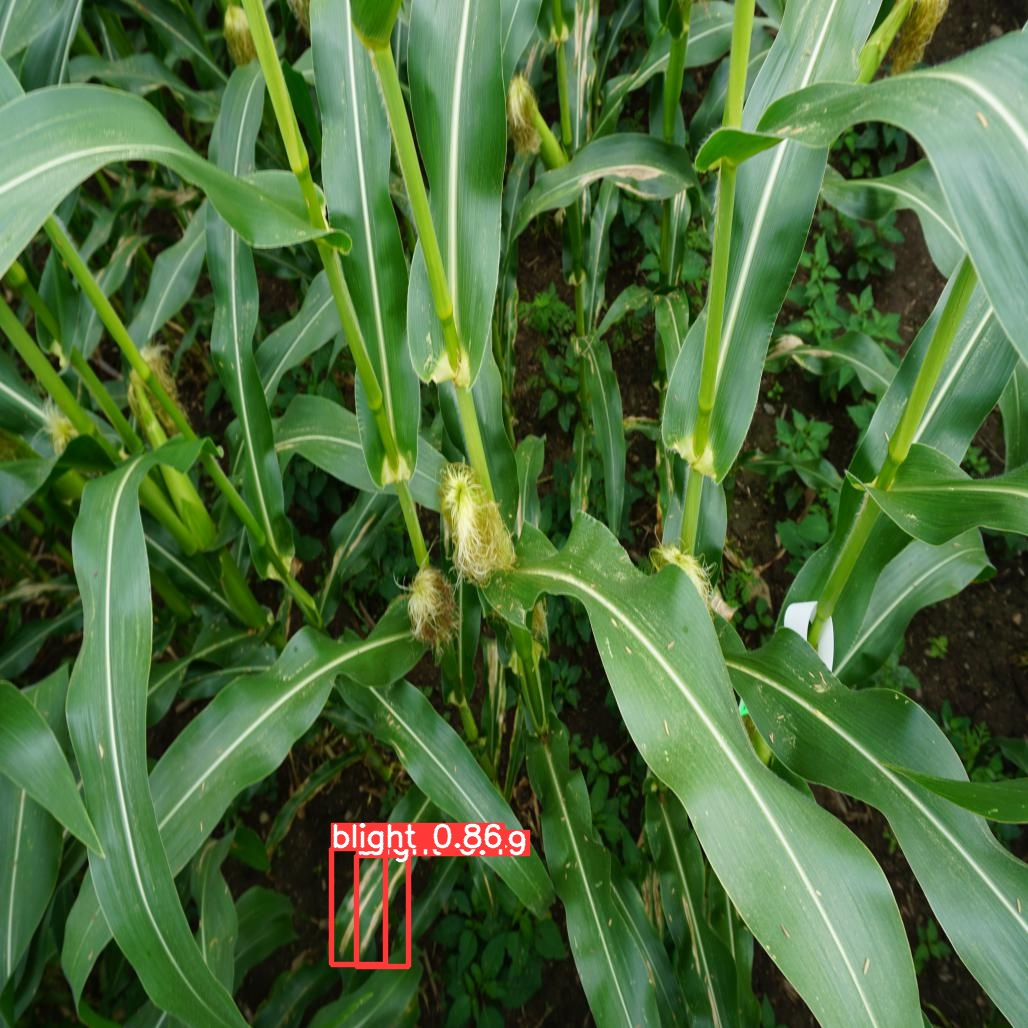

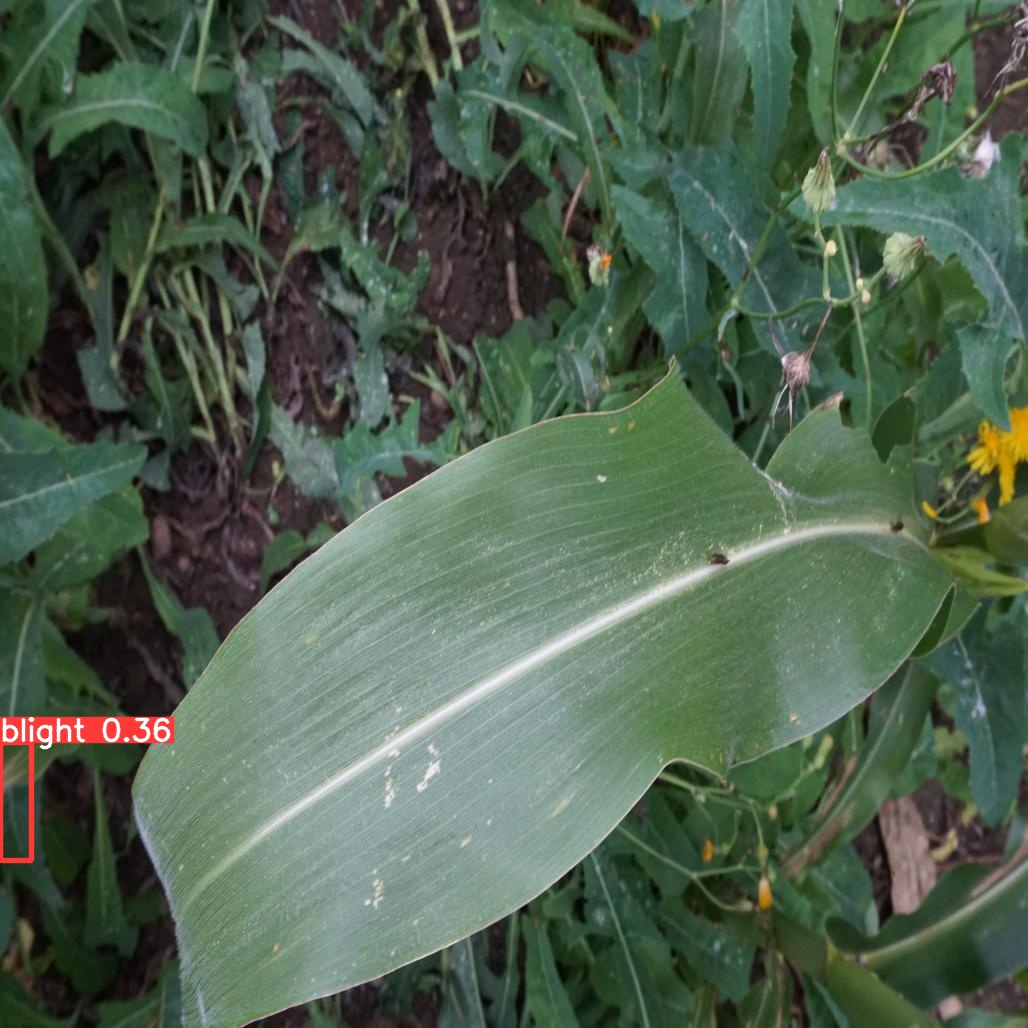

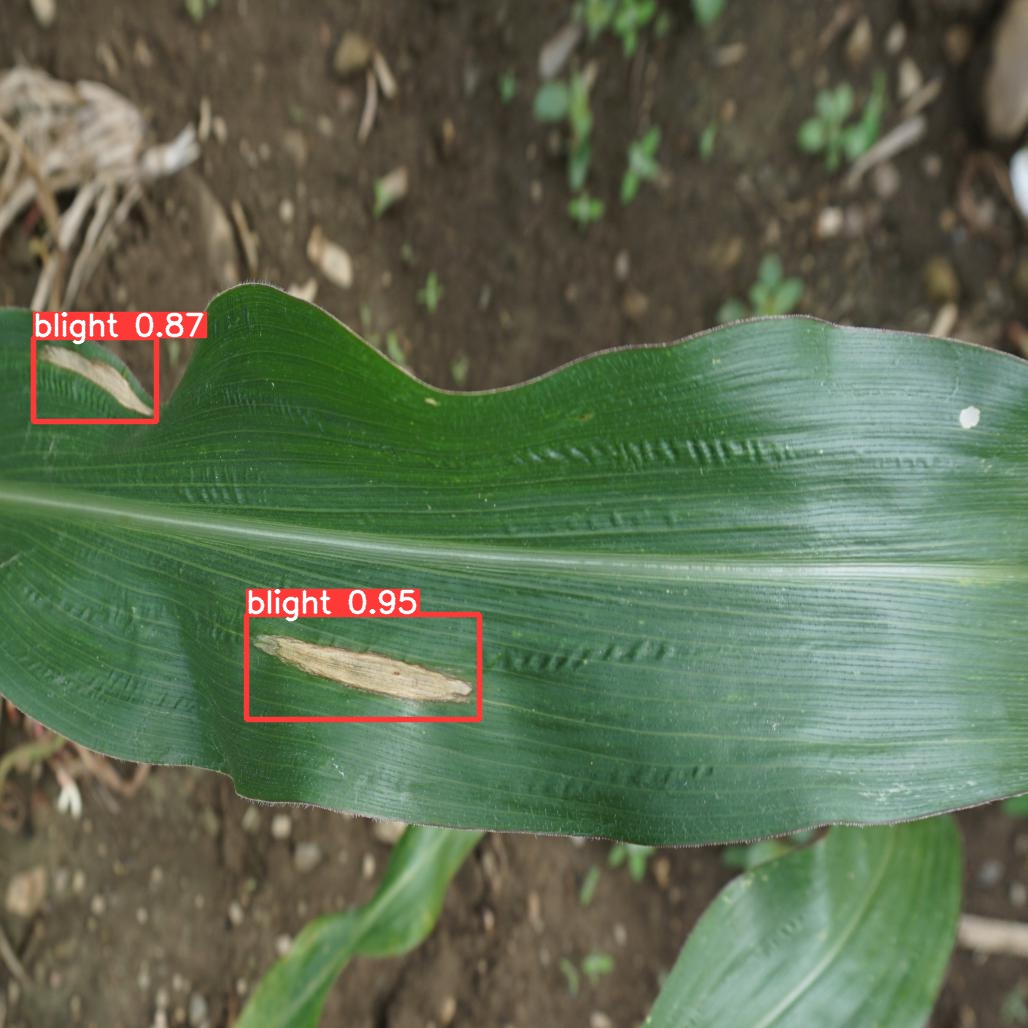

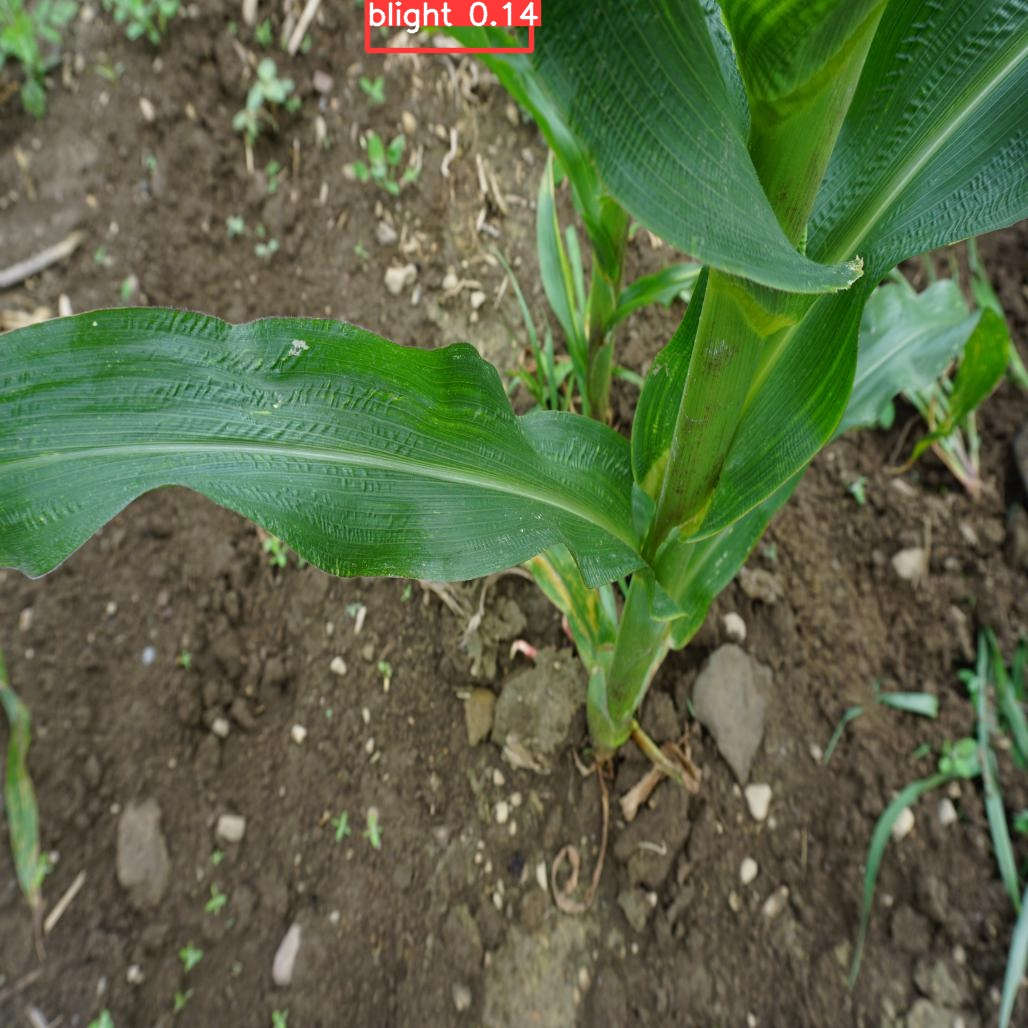

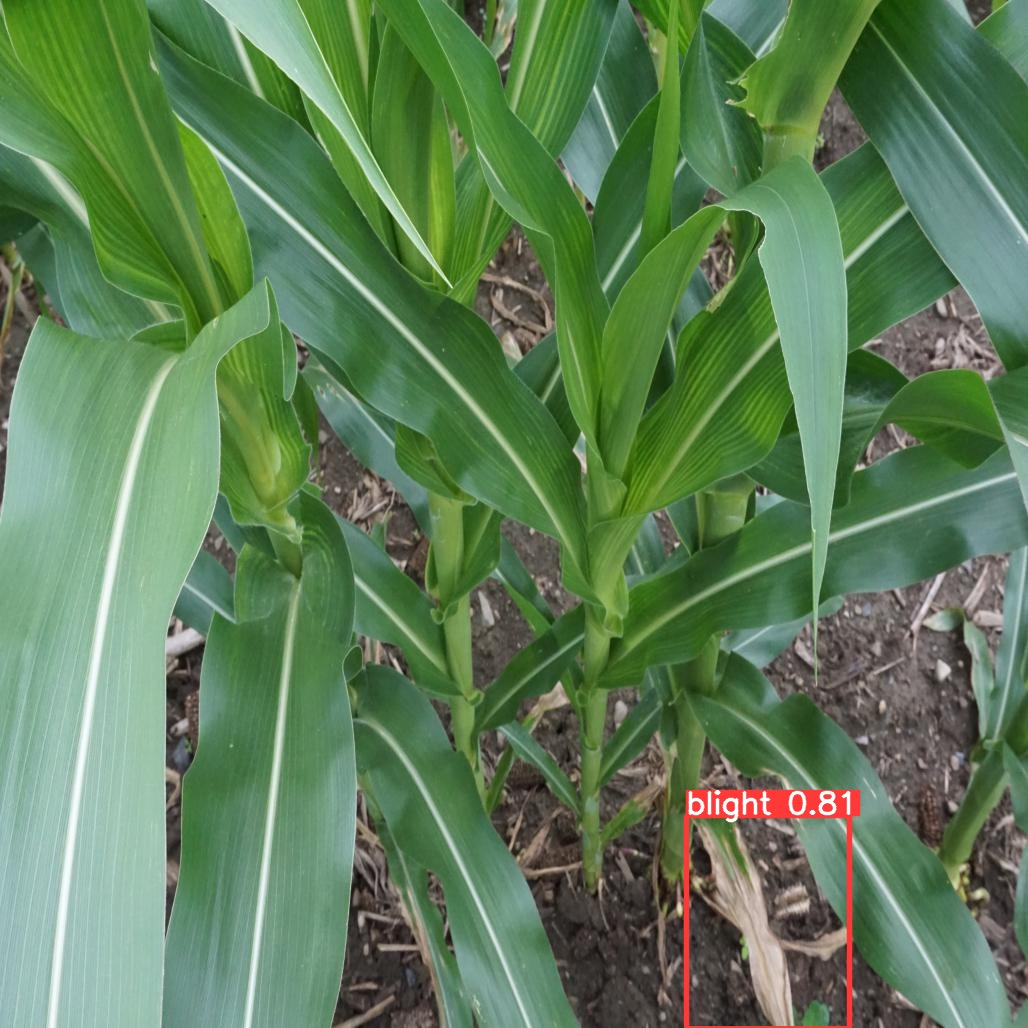

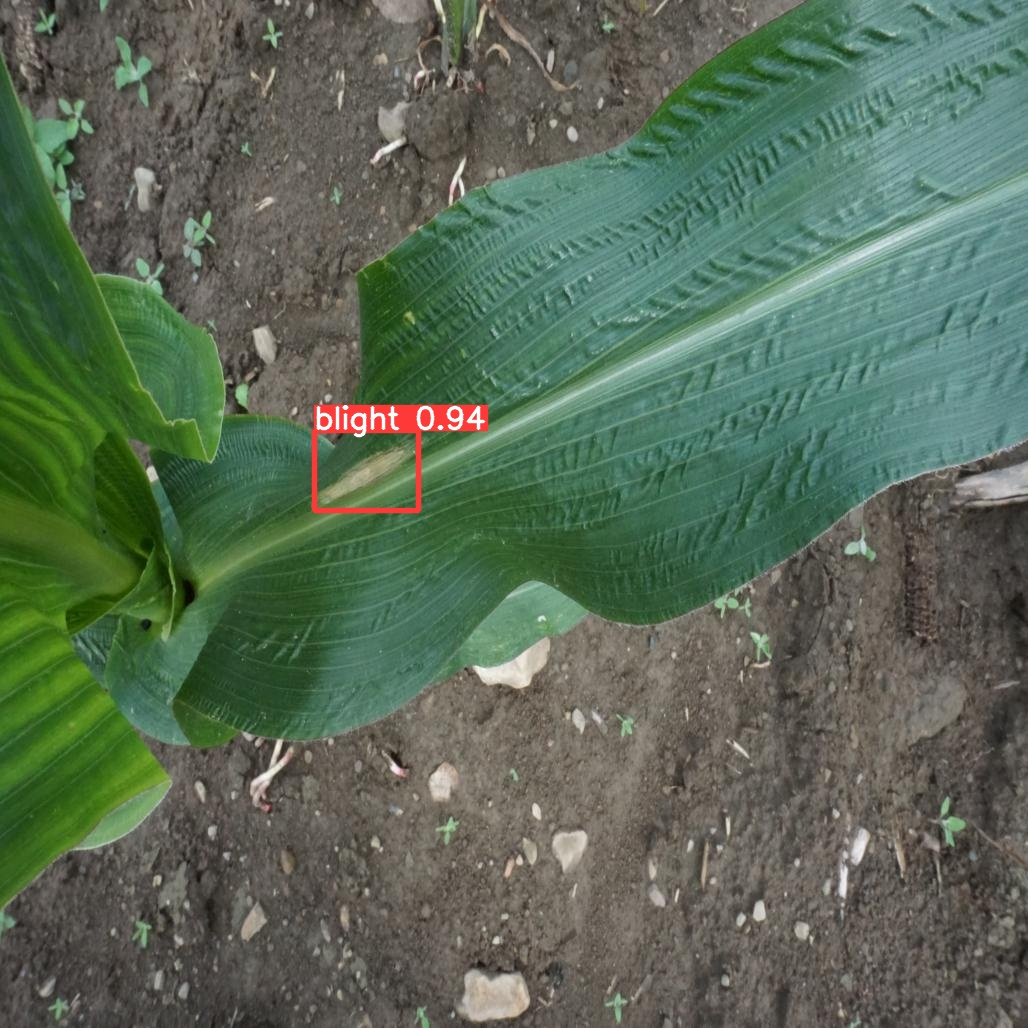

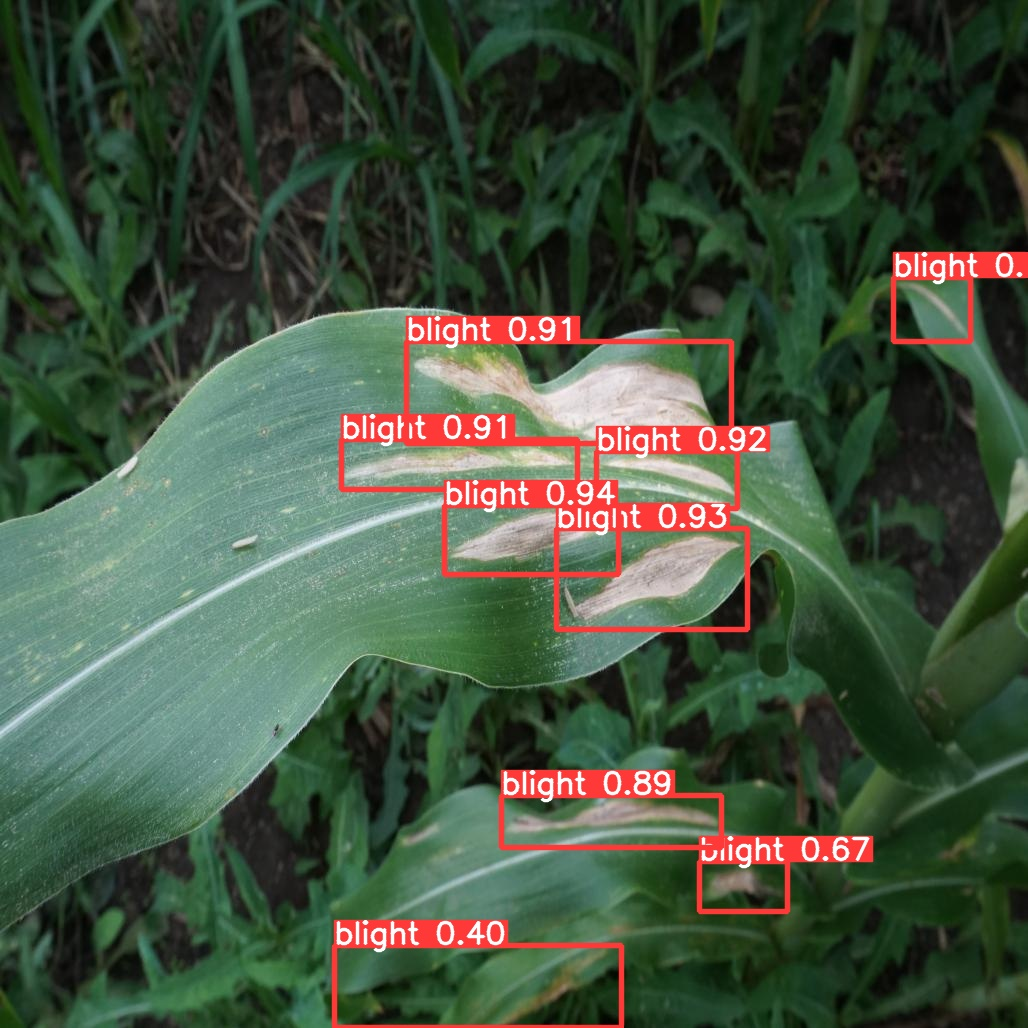

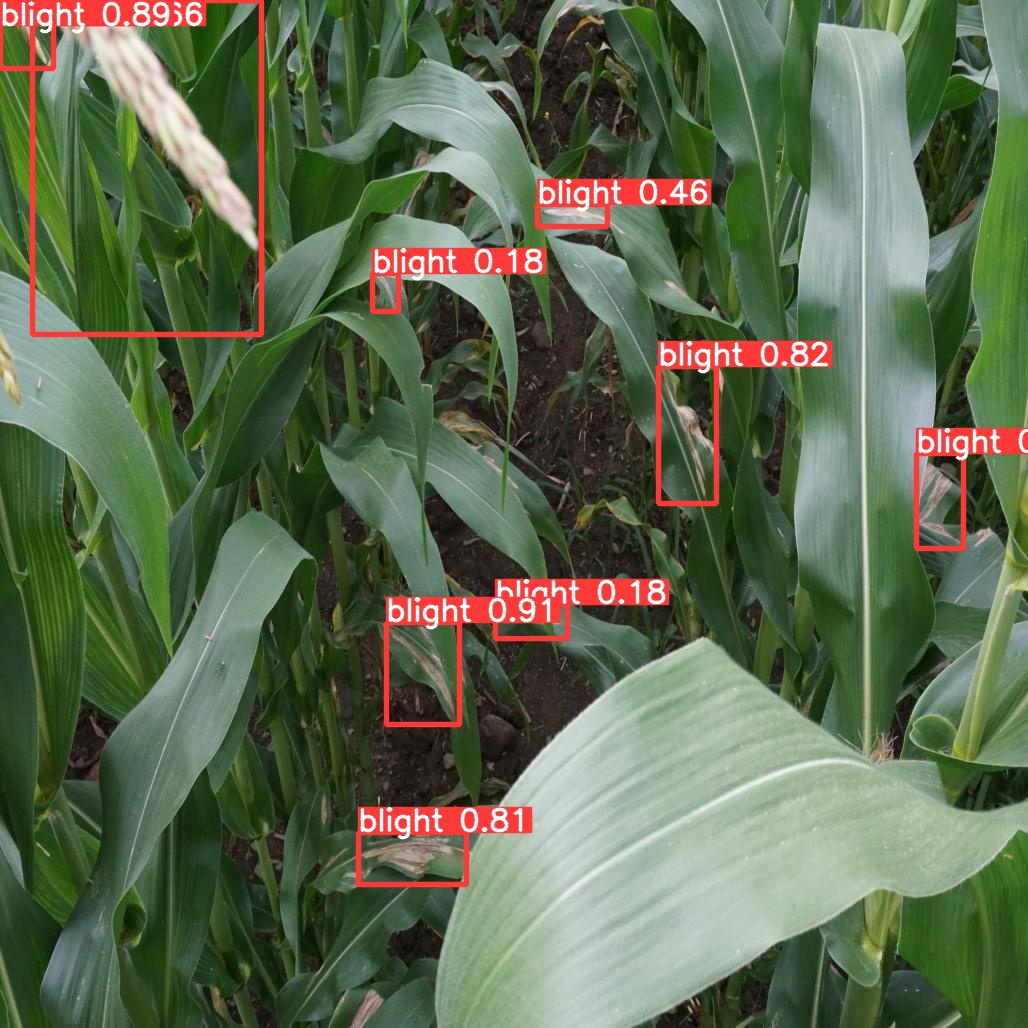

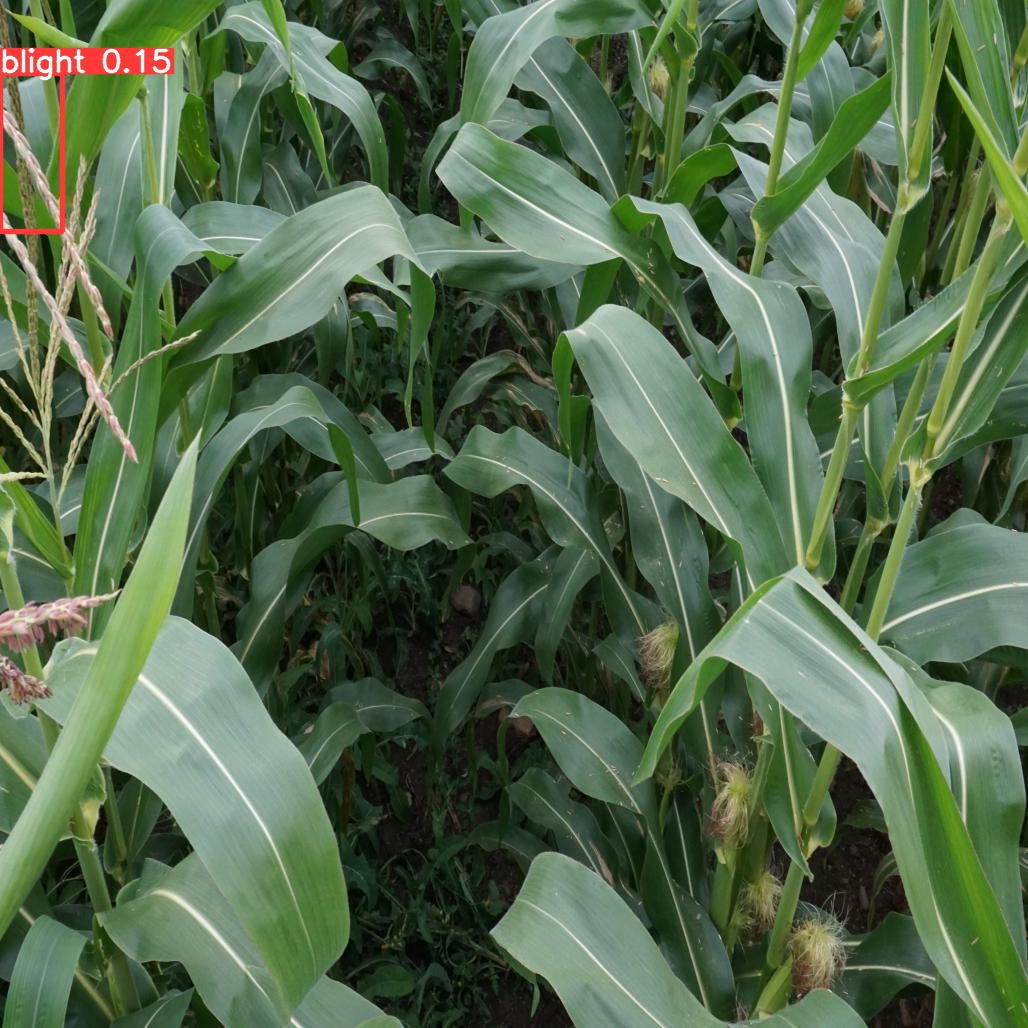

In [8]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")